In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')



,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


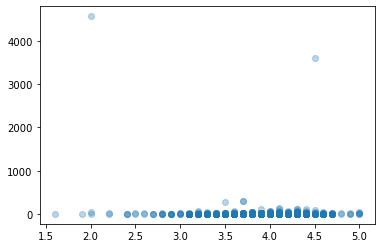

In [15]:
skincare_data = pd.read_csv("00. InfoProduct.csv")
#skincare_data = skincare_data['Reviewer'].drop()

skincare_data=skincare_data.drop(['Reviewer'], axis=1)

#lowercase column titles
new_colnames = [i.lower() for i in skincare_data.columns]
skincare_data=skincare_data.copy()
skincare_data.columns=new_colnames

#Price: Rp --> USD
skincare_data['price'] = skincare_data['price'].str.replace('Rp.', '')
skincare_data['price'] = skincare_data['price'].str.replace('.','')
skincare_data['price'] = skincare_data['price'].astype(float)
skincare_data["price"] = 0.00007 * skincare_data["price"]


#categorize columns by Category
#categorize by Merk
#rename merk --> brand
skincare_data = skincare_data.rename(columns = {"merk" : "brand"})
skincare_data = skincare_data.rename(columns = {"overallrating" : "rating"})
skincare_data.head()
#groupby brands
brands_group=skincare_data.groupby('brand')['rating'].mean()
#average ratings per Category/Merk
    #boxplots
    
#plot=skincare_data.boxplot('rating', by='brand')
plt.scatter(x=skincare_data['rating'],y=skincare_data["price"], alpha=0.3)
display(plot)
    
skincare_data.head()


Text(0, 0.5, 'Price')

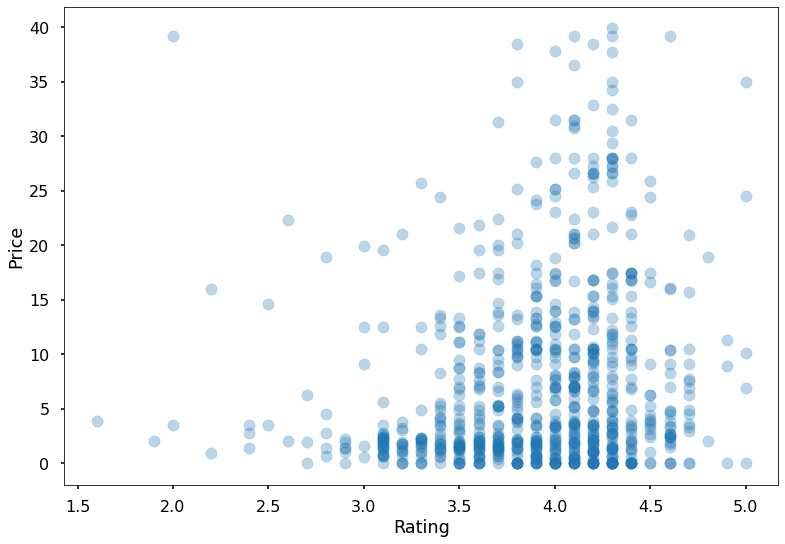

In [46]:
skincare_subset=skincare_data.loc[(skincare_data['price']<40)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
display(plot)
plt.xlabel('Rating')
plt.ylabel('Price')


array(['Night Cream', 'Face Mist', 'Day Cream', 'Sun Protection',
       'Lotion & Emulsion', 'Face Oil', 'Eye Treatment',
       'Brow & Lash Treatment', 'Skin Soothing Treatment',
       'Acne Treatment', 'Serum & Essence', 'Peeling', 'Sleeping Mask',
       'Mask Sheet', 'Nose Pack', 'Wash-Off', 'Facial Wash',
       'Cream & Lotion', 'Oil', 'Makeup Remover', 'Scrub & Exfoliator',
       'Toner'], dtype=object)

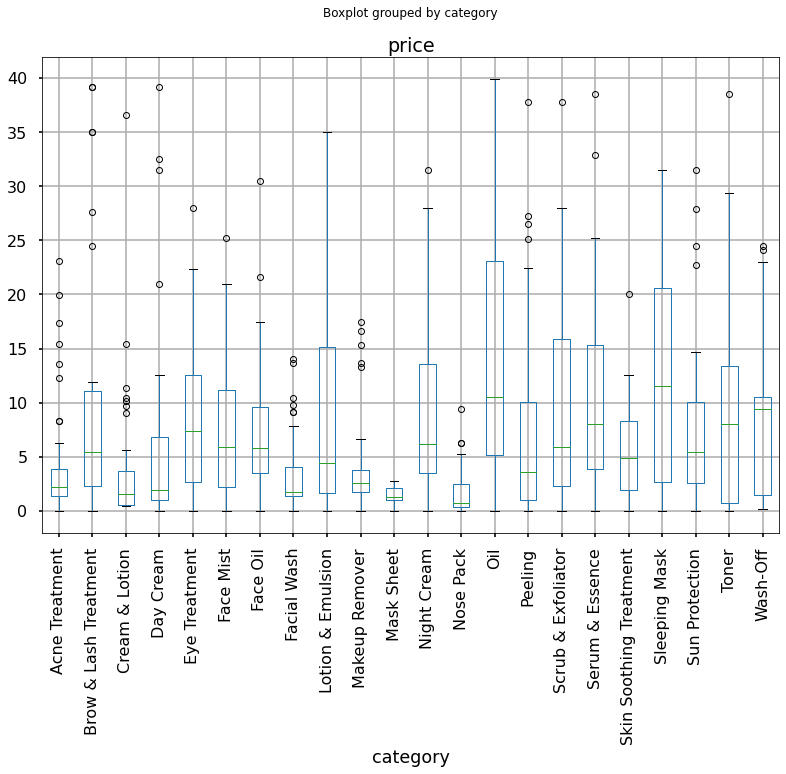

In [47]:
plot=skincare_subset.boxplot('price', by='category', rot=90)
skincare_data['category'].unique()

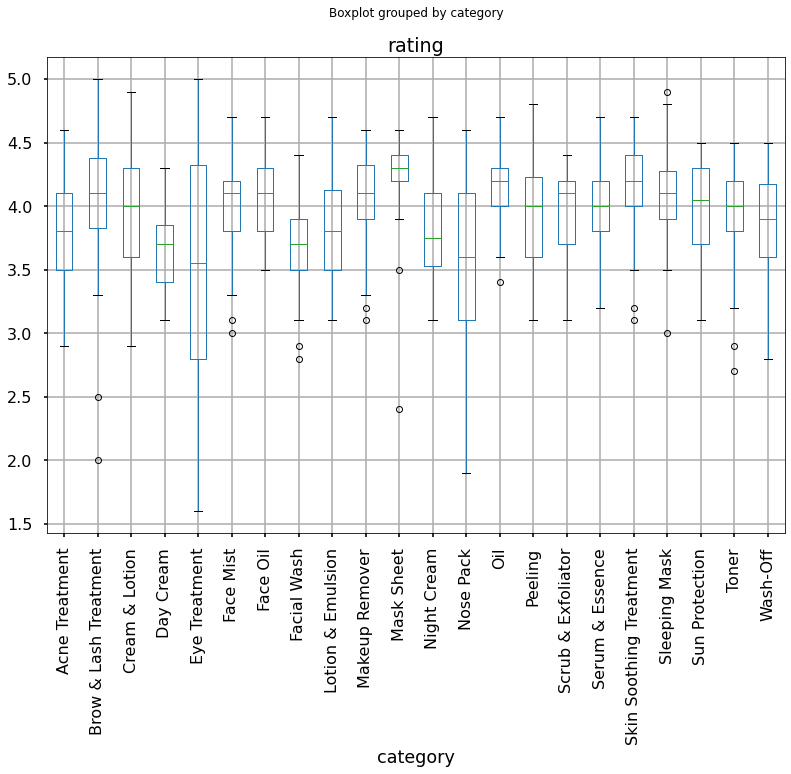

In [48]:
plot=skincare_subset.boxplot('rating', by='category', rot=90)